# Problem Statement: Concrete Strength Prediction
## Objective:
To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.


## Attribute Information:
Name -- Data Type -- Measurement -- Description

- Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
- Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
- Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
- Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
- Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
- Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
- Age -- quantitative -- Day (1~365) -- Input Variable
- Concrete compressive strength -- quantitative -- MPa -- Output Variable 

# Import necessary libraries and load the data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')
# adding graphics
sns.set(color_codes=True)

In [2]:
df = pd.read_csv('concrete.csv')
print('Shape before deleting duplicate values:', df.shape)

# Removing duplicate rows if any
df=df.drop_duplicates()
print('Shape After deleting duplicate values:', df.shape)

df.head(10)

Shape before deleting duplicate values: (1030, 9)
Shape After deleting duplicate values: (1005, 9)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1005 non-null   float64
 1   slag          1005 non-null   float64
 2   ash           1005 non-null   float64
 3   water         1005 non-null   float64
 4   superplastic  1005 non-null   float64
 5   coarseagg     1005 non-null   float64
 6   fineagg       1005 non-null   float64
 7   age           1005 non-null   int64  
 8   strength      1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [4]:
df.shape

(1005, 9)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplastic,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fineagg,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


In [6]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

### Insights:
- All Numerical data 
- No Null Value 
- The dataset contains no missing values
- Age data may have Outlier as Max value is very large as compared to 3rd Quartile

# Exploratory Data Analysis

## Boxplot

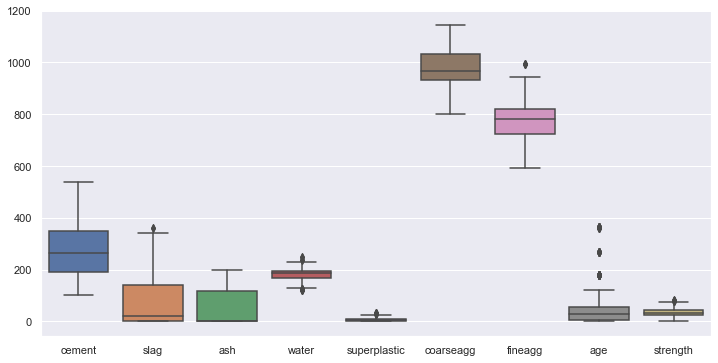

In [7]:
plt.subplots ( figsize= ( 12, 6) )
ax= sns.boxplot( data= df )


### Insights:
- Age has maximum number of Outliers 
- slag , water, superplastic, fineagg and strength also has a small outlier

## Pairplots

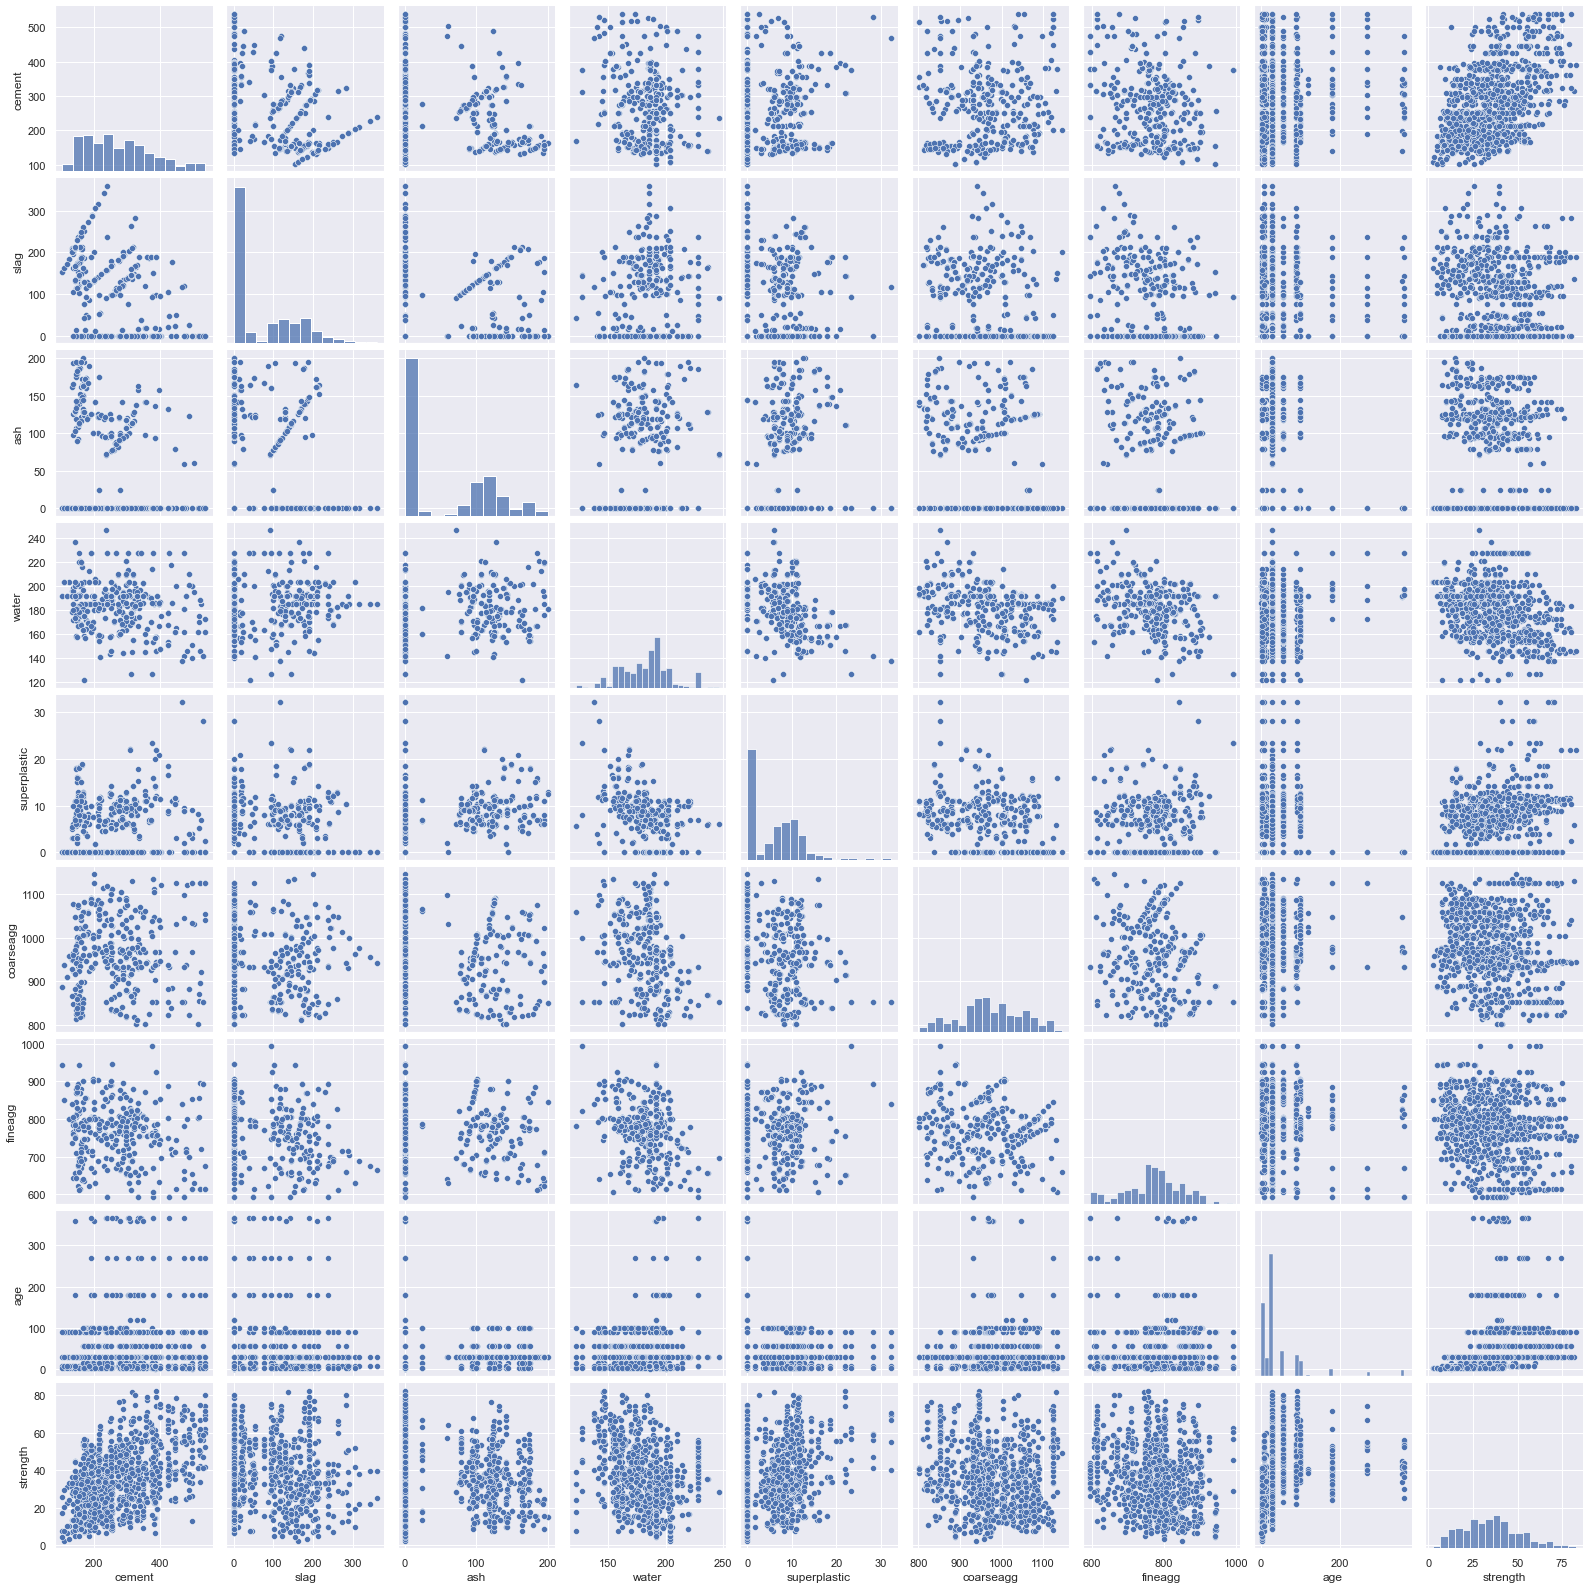

In [8]:
sns.pairplot (df)

### Insights

- Slag and ash has 2 gaussians and is skewed
- Age data shows the presence of outliers
- ash, coarseagg and fineagg are weak predictors
- Water has a negative correlation with strength
- Superplastic has positive correlation with strength

## Histplot

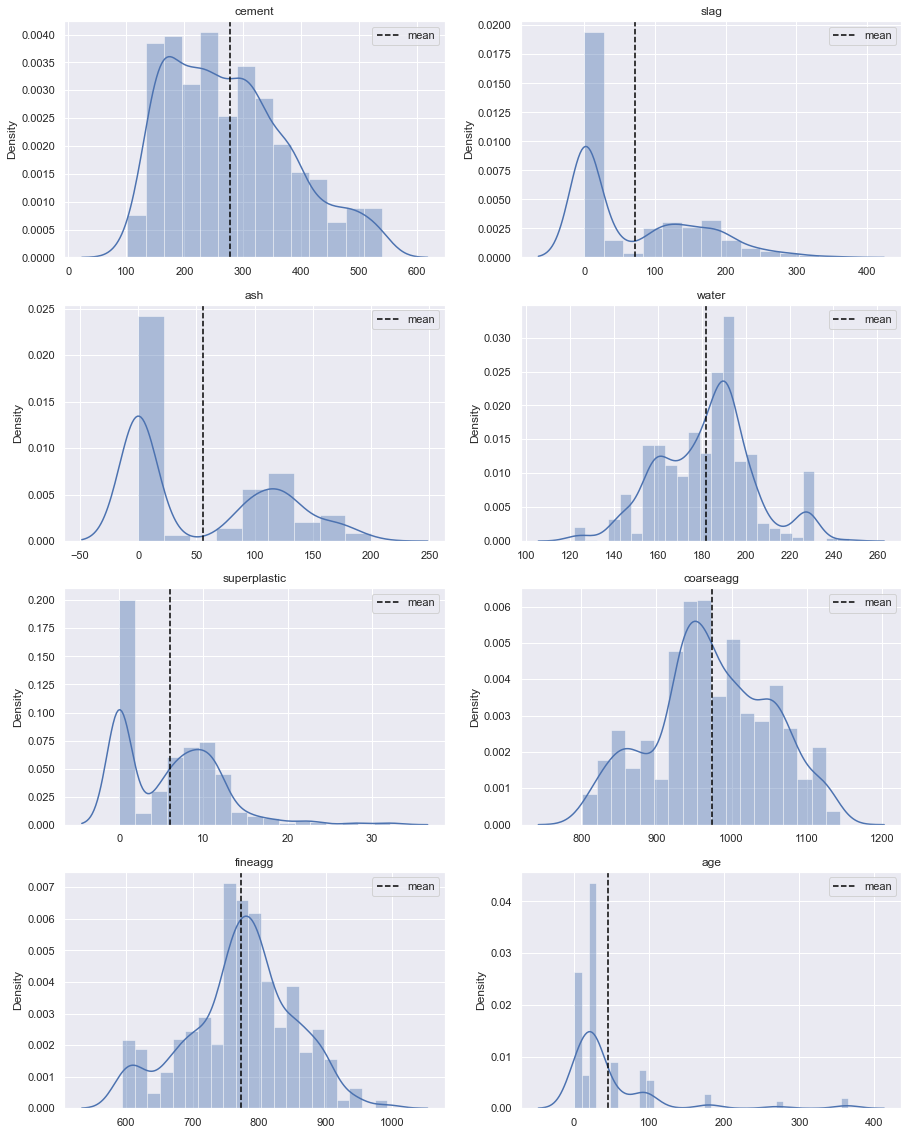

In [9]:
import itertools

cols = [i for i in df.columns if i != 'strength']

fig = plt.figure(figsize=(15, 20))

for i,j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df[i])
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean", color='black')
    plt.legend()
    plt.title(i)
    plt.xlabel("")

### Insights:

- Distribution of cement appears nearly normal

- Water and Superplastic have near normal distributions

- Strength is normally distributed




## lmplots

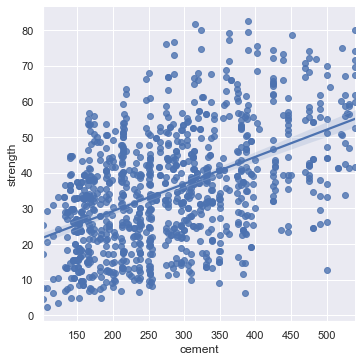

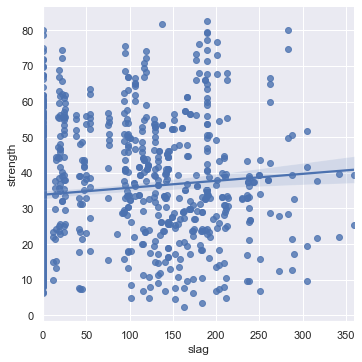

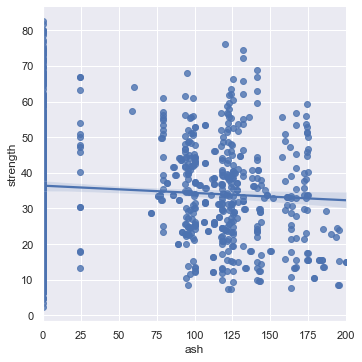

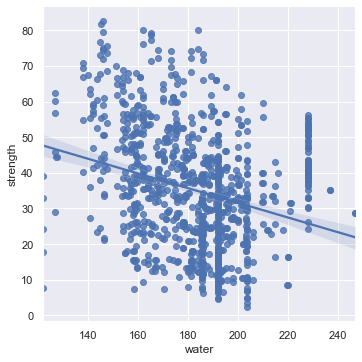

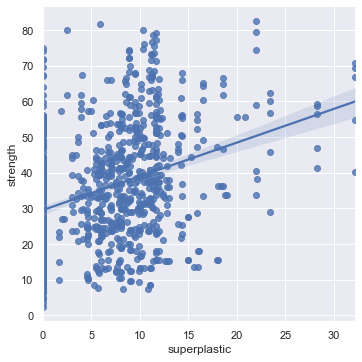

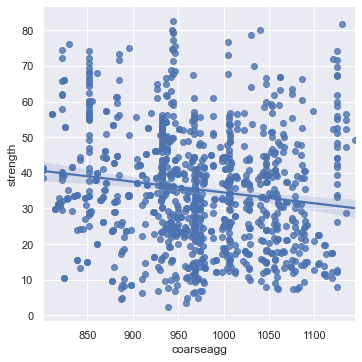

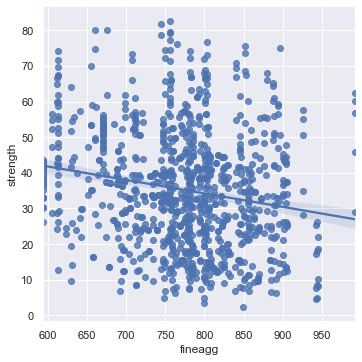

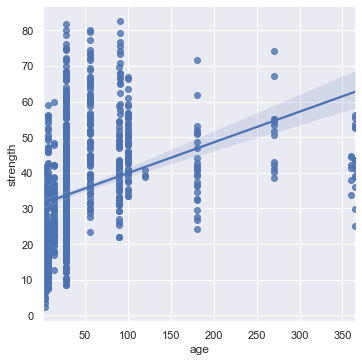

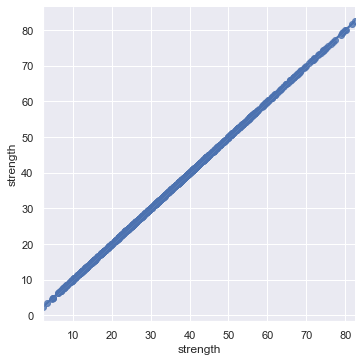

In [10]:
for col in df.columns:
  sns.lmplot(data=df, x=col, y='strength')

### Insights
- Water, superplastic, age and cement are the most important attributes for strength prediction
- ash, coarseagg and fineagg are not strong predictors. 

## Correlation 

In [11]:
# Creating the correlation matrix
Corr_Data=df.corr()
Corr_Data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
superplastic,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
coarseagg,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
fineagg,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
strength,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


### Insights
- cement and age have strong correlation with strength
- Super plastic has mild positive correlation with strength
- water and superplastic have strong correlation

In [12]:
# Filtering only those columns where absolute correlation > 0.2 with Target Variable
Corr_Data['strength'][abs(Corr_Data['strength']) > 0.2 ]

cement          0.488283
water          -0.269624
superplastic    0.344209
age             0.337367
strength        1.000000
Name: strength, dtype: float64

## Selecting final predictors for Machine Learning

In [13]:
SelectedColumns=['cement','superplastic','age', 'strength']

# Selecting final columns
Data_ML=df[SelectedColumns]
Data_ML.head()

,cement,superplastic,age,strength
0,141.3,0.0,28,29.89
1,168.9,10.8,14,23.51
2,250.0,5.5,28,29.22
3,266.0,0.0,28,45.85
4,154.8,9.1,28,18.29


In [14]:
Data_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1005 non-null   float64
 1   superplastic  1005 non-null   float64
 2   age           1005 non-null   int64  
 3   strength      1005 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 39.3 KB


# Feature Engineering 

## Outlier Treatment

In [15]:
q1= df.quantile(0.25)
q3= df.quantile(0.75)
IQR = q3-q1
outliers = pd.DataFrame((df>(q3+1.5*IQR)) | (df<(q1-1.5*IQR))).sum(axis=0)
outliers
                      

cement           0
slag             2
ash              0
water           15
superplastic    10
coarseagg        0
fineagg          5
age             59
strength         8
dtype: int64

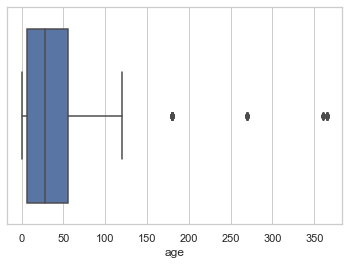

In [16]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df.age)

In [17]:
df.loc[df.age > 100] = df.age.median()

# Split the dataset into train set test set also the validation

In [18]:
from sklearn.model_selection import train_test_split
X = Data_ML.drop('strength',axis=1)  #set of independent variable
y = Data_ML ['strength']   #set of dependent variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [19]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)


# Model1 : Linear Regression 

In [28]:
#Model 1= linear regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc


regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
prediction=regression_model.predict(X_test)


print('Accuracy of model is', regression_model.score(X_test, y_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test

Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy of model is 0.4471045939369468
Mean Absolute Error: 9.525856443784033
Mean Squared Error: 140.7337075949697
Root Mean Squared Error: 11.86312385482718

Accuracy values for 10-fold Cross Validation:
 [81.50181362 80.1400738  82.78966076 78.89388422 80.96222684 82.28099748
 81.03804182 82.67135776 83.58864161 84.8615062 ]

Final Average Accuracy of the model: 81.87


# Model2: Decision Tree

In [26]:
#Model 2 = Decision Trees 
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=6,criterion='mse')
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    return(100-MAPE)

from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


DecisionTreeRegressor(max_depth=6)
R2 Value: 0.8580444104627363

Accuracy values for 10-fold Cross Validation:
 [78.38742453 77.10332888 75.82667285 75.38828145 77.91608286 77.54376335
 77.06720551 78.08771338 78.43420561 76.40260449]

Final Average Accuracy of the model: 77.22


# Model3: Adaboost

In [27]:
#Model 3 = Adaboost 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 10 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=10)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.9839555554996181

Accuracy values for 10-fold Cross Validation:
 [81.14103014 80.32019288 82.35274037 78.3197653  81.15709525 82.52560944
 80.86689445 83.25913491 83.02090929 85.40563269]

Final Average Accuracy of the model: 81.84


# Best Model Selection

Based on the above trials we get the various average accuracies. In this case, multiple algorithms have produced similar kind of average accuracy. 

I am choosing #Model 1= linear regression as the final model since it is producing the best accuracy 82 on this data.